In [3]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:

X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model.fit(X_train, y_train, batch_size = 20, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 11s 10ms/step - loss: 2.1753 - accuracy: 0.4469 - val_loss: 1.8682 - val_accuracy: 0.5321
Epoch 2/200
450/450 [==============================] - 4s 8ms/step - loss: 1.7271 - accuracy: 0.5551 - val_loss: 1.6987 - val_accuracy: 0.5632
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.5386 - accuracy: 0.6100 - val_loss: 1.5140 - val_accuracy: 0.6153
Epoch 4/200
450/450 [==============================] - 4s 8ms/step - loss: 1.3557 - accuracy: 0.6519 - val_loss: 1.3931 - val_accuracy: 0.6469
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2278 - accuracy: 0.6896 - val_loss: 1.2948 - val_accuracy: 0.6754
Epoch 6/200
450/450 [==============================] - 4s 8ms/step - loss: 1.1369 - accuracy: 0.7098 - val_loss: 1.2536 - val_accuracy: 0.6915
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.0382 - accuracy: 0.7347 - val_loss: 1.2062 - val_accuracy: 0.69

In [10]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2222 - accuracy: 0.7177

 Test Accuracy: 0.7177


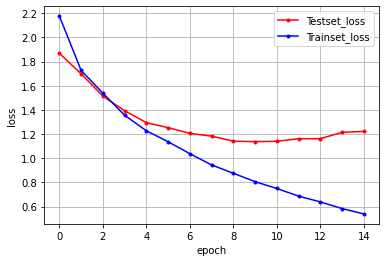

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c="red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker ='.', c="blue", label = 'Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()